# Capstone: Analisando a temperatura do Brasil

Nessa prática iremos juntar os conhecimentos que vimos durante toda a matéria. Vamos analisar os dados de temperatura do Brasil que vimos nas aulas de Python. Vamos utilizar uma [regressão linear](https://pt.wikipedia.org/wiki/Regress%C3%A3o_linear) para estimar a taxa de variação da temperatura ao longo dos anos. Finalmente, vamos visualizar esses valores em um mapa do Brasil.

Faremos funções para cada etapa para podermos testar as partes do nosso código separadamente.

## Setup

Abaixo, vamos carregar todas as bibliotecas que precisamos:

* `numpy` para fazer contas com matrizes e vetores
* `maptlotlib.pyplot` para fazer gráficos
* `mpl_toolkits.basemap` para fazer mapas
* `scipy.stats` para a regressão linear
* `glob` para descobrir os nomes de todos os arquivos em uma pasta

In [64]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from scipy.stats import linregress
from glob import glob
#Importando bibliotecas necessarias para confecção do código.

<div class="alert text-center" style="font-size: 16pt">
Diferente das outras práticas, eu vou preecher o código inicial ao vivo durante a aula. 
<br><br>
Façam junto comigo para não se perderem.
</div>

In [65]:
def le_lat_long(nome_arquivo):
    #Função para buscar e ler, latitude e longitude no arquivo "dados".
    arquivo = open(nome_arquivo)
    for linhas in range(0,5):
        linha = arquivo.readline()
    lat = -float(linha.split()[1])
    lon = -float(linha.split()[3])
    return lat, lon

In [66]:
lat, lon = le_lat_long('dados/0.80S-49.02W-TAVG-Trend.txt')
print(lat, lon)
#Testando função que busca e le os "dados" e retorna valores de latitude e longitude. 

-0.8 -49.02


In [67]:
def le_temp_abs(nome_arquivo):
    #Função para buscar e ler, valores de temperatura absoluta no arquivo "dados".
    arquivo = open(nome_arquivo)
    for linhas in range(0,48):
        linha = arquivo.readline()
    partes = linha.split()
    temp_abs = float(partes[-3])
    return temp_abs

In [68]:
temp_abs = le_temp_abs('dados/0.80S-49.02W-TAVG-Trend.txt')
print(temp_abs)
#Testando função que busca e le os "dados" e retorna valor de tamperatura absoluta.

26.74


In [69]:
def le_anos_anomalias(nome_arquivo):
    #Função para buscar e ler, valores de anomalias anuais.
    dados = np.loadtxt(nome_arquivo, comments = '%')
    ano = dados[:,0]
    mes = dados[:,1]
    anos_decimais = ano + ((mes-1)/12)
    anomalia = dados[:,4]
    return anos_decimais, anomalia
    

In [70]:
anos, anom = le_anos_anomalias('dados/0.80S-49.02W-TAVG-Trend.txt')
print(anos, anom)
#Testando função que busca e le os "dados" e retorna valores de anomalias anuais.

[ 1845.          1845.08333333  1845.16666667 ...,  2013.5         2013.58333333
  2013.66666667] [   nan    nan -0.872 ...,    nan    nan    nan]


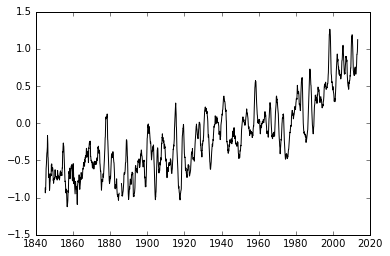

In [71]:
plt.figure()
plt.plot(anos, anom, '-k')

In [72]:
def cal_temp_real(nome_arquivo):
    #Função que calcula a temperatura real a partir das anomalias anuais e da temp absoluta.
    anos, anom = le_anos_anomalias(nome_arquivo)
    temp_abs = le_temp_abs(nome_arquivo)
    temperatura = anom + temp_abs
    return (anos, temperatura)

In [73]:
anos, temperatura = cal_temp_real('dados/0.80S-49.02W-TAVG-Trend.txt')
print(anos, temperatura)
#Testando função que retornaa os valores de temperatura real.

[ 1845.          1845.08333333  1845.16666667 ...,  2013.5         2013.58333333
  2013.66666667] [    nan     nan  25.868 ...,     nan     nan     nan]


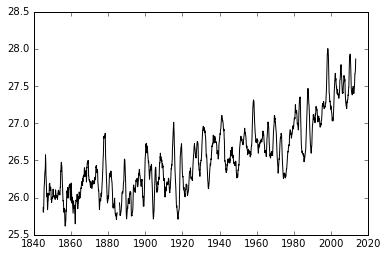

In [74]:
plt.figure()
plt.plot(anos, temperatura, '-k')

In [75]:
not_nan = ~np.isnan(temperatura)
#Retirando os dados "NANs"
temperatura_sem_nan = temperatura[not_nan]
#Criando valores de temperatura sem valores "NANs"
anos_sem_nan = anos[not_nan]
#Criando valores de anos sem valores "NANs"

In [76]:
a, b, r_value, p_value, std_err = linregress(anos_sem_nan, temperatura_sem_nan)
#Regressão para encontrar a taxa de variação

In [77]:
print(a)
#Printando valor da taxa de variação

0.00832160974446


In [78]:
arquivos = glob('dados/*.txt')
lat_cidade = []
lon_cidade = []
taxa_de_var_temp = []
for arquivo in arquivos:
    lat, lon = le_lat_long(arquivo)
    le_temp_abs(arquivo)
    anos, anom = le_anos_anomalias(arquivo)
    anos, temperatura = cal_temp_real(arquivo)
    not_nan = ~np.isnan(temperatura)
    temperaturas_sem_nan = temperatura[not_nan]
    a, b, r_value, p_value, std_err = linregress(anos_sem_nan, temperatura_sem_nan)
    lat_cidade.append(lat)
    lon_cidade.append(lon)
    taxa_de_var_temp.append(a)

In [79]:
print(lat_cidade)
print(lon_cidade)
print(taxa_de_var_temp)

[-0.8, -10.45, -13.66, -15.27, -2.41, -20.09, -20.09, -23.31, -23.31, -24.92, -29.74, -4.02]
[-49.02, -48.27, -38.81, -47.5, -60.27, -44.36, -54.6, -42.82, -46.31, -49.66, -51.69, -40.98]
[0.0083216097444633302, 0.0083216097444633302, 0.0083216097444633302, 0.0083216097444633302, 0.0083216097444633302, 0.0083216097444633302, 0.0083216097444633302, 0.0083216097444633302, 0.0083216097444633302, 0.0083216097444633302, 0.0083216097444633302, 0.0083216097444633302]


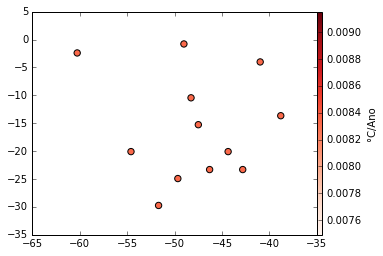

In [80]:
#Plotamos gráfico de taxas de variação nas capitais.
plt.figure()
plt.scatter(lon_cidade, lat_cidade, s=40, c=taxa_de_var_temp, cmap="Reds")
cb = plt.colorbar(pad=0, aspect=40)
cb.set_label('°C/Ano')

In [87]:
bm = Basemap(projection='merc', llcrnrlat=-35, llcrnrlon=-65, urcrnrlat=5, urcrnrlon=-35)
#Definindo região do globo a ser plotada.

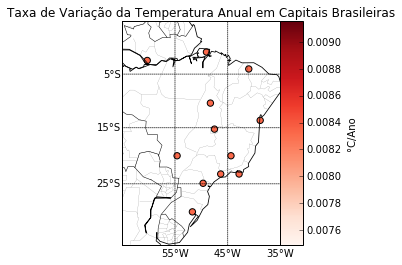

In [97]:
#Plotando grafico de Taxa de Variação da temperatura anual em capitais Brasileiras.
plt.figure()
bm.scatter(lon_cidade, lat_cidade, s=40, c=taxa_de_var_temp, cmap="Reds", latlon=True)
cb = plt.colorbar(pad=0, aspect=10)
cb.set_label('°C/Ano')
bm.drawcoastlines(linewidth=0.8) #Linhas de Costa
bm.drawcountries(linewidth=0.5) # Paises
bm.drawstates(linewidth=0.1) #Estados
bm.drawmeridians([-55,-45,-35], labels=[0,0,0,1]) #Meridianos
bm.drawparallels([-5,-15,-25], labels=[1,0,0,0]) #Paralelos
plt.title('Taxa de Variação da Temperatura Anual em Capitais Brasileiras') #Adicionando Titulo ao gráfico